### The Battle of the Cities - Where to retire in Colorado?

#### Author: Nuno Roberto

Notes
---
This report was prepared to complete the IBM Data Science Capstone Project requirements and offered online by Coursera. The project utilizes a similar approach to that of the Battle of the neighborhoods (NEIs) insofar as to utilize similar information to that collect in the labs and projects completed in the certification. These sources are publicly available GIS data sources, and Foursquare location based points of interest.

Introduction and Business Problem
----
I live and work in California but I “play” in Colorado, Utah, and Arizona, ie , every time I want to have some fun I drive all the way to some remote location in Colorado or Utah and go for hikes in Bryce Canyon, Arches, Zion, Capitol Reef, Grand Canyon, or one of the many awesome National Parks in any of these states. 

It is always summer in California and it’s great from a weather’s point of view, if you like it but there’s no seasons. We pay high taxes in almost every aspect of our lives – sales, car, home, state, business, you name it we have it and it’s always high taxes.
When both my wife and I retire, I want to move to a state that has all the fun things we like to do, but a state that provides a much better cost of living, much better outdoor activities, low on pollution, has well defined seasons year-round, it is great for foodies, and we don’t have to drive for miles just to get a carton of milk.

Telluride is nestled between mountains and has a great yearly film festival attended by famous actors and actresses, who also own their homes outside town (NOTE: the median home price in Telluride is 902,000 likely skewed by famous homes sold at over $10million!!)

Telluride has winter resorts for locals and visitors alike and it’s extremely popular as a winter destination.
Telluride still has the old-west feeling, while catering to people who want to retire in a modern town with small businesses, and amenities that support a great community year round.

In the battle of the NEIs we analyzed points of interest between Toronto and NY. These are big cities, with plenty of information available on FourSquare. How will FourSquare handle information not at a neighborhood level but at a city or town level. How will it handle API calls that pull data based on my personal criteria (weather, food, supermarkets, outdoor fun, and trails)?
Once this project is completed, I expect to confirm my assertion about Telluride based on my personal criteria.




Problem Description
----
Identifying a town in the US to retire is a daunting task for anyone, and more so if you don’t have the right resources available to you. The retiring process is complex and it has many, many pitfalls, related to location, amenities, costs of living, medical facilities, and so on.

Availability of data and research are crucial in identifying a state and a town to retire and provide a smooth transition from active careers to a retirement phase of our lives.

The initial problem to resolve in this phase of the project is to identify the public data sources that have enough information to collate with Foursquare and analyze using one of several machine learning approaches.

Even data from universities is not bullet-proof and during my initial research I found several data points that were not available or had to be highly curated before I could use them (or not at all).

The criteria used to select the best town to retire might not be appropriate for every situation. For my use case I first had to check Foursquare information and verify if data for at least a small group of towns in Colorado was available both in Foursquare and in a GIS JSON file of Colorado towns. 

The Weather data, although provided by NOAA and displayed in Wikipedia, is not used at all by some towns. This is primarily because NOAA does not have weather stations to collect data at certain locations in the US. To track the weather in small towns in the US one has to rely on aggregated weather information from larger cities (eg, Boulder, CO). The problem with this approach is that weather in mountain towns is often localized and it expresses microclimates that are not captured by weather stations.

Since weather was one of the major categories in my selection criteria to identify a town for retirement, several interesting cities could not be include in the analysis and recommendations because of a lack of sufficient weather data.

Finally, Foursquare is a site that relies on location data to show interesting points in a map, but it relies heavily on availability of wireless connectivity and precise cell phone signal and that’s not always available in remote areas of Colorado. So, if I want to retire to Telluride, CO, known as a small true-american town nestled between mountain peaks, far from civilization, good luck to me finding data to analyze the assertion that Telluride is the best overall town to retire in Colorado.


### Import the required libraries 

In [1]:
# Import html and libs for handling page requests
import requests
import lxml.html as html

!conda install -c conda-forge beautifulSoup4 --yes
from bs4 import BeautifulSoup

print("I now know HTML...")

Solving environment: ...working... done

# All requested packages already installed.


C:\Users\nroberto\Battle of the NEIs>set "JAVA_HOME="  

C:\Users\nroberto\Battle of the NEIs>set "JAVA_HOME_CONDA_BACKUP="  

C:\Users\nroberto\Battle of the NEIs>set "JAVA_HOME=C:\Users\nroberto\.conda\envs\rstudio\Library"  
I now know HTML...


In [2]:
# Import dataframes and related libs
import pandas as pd # Note: will be using pandas instead of the beatifulsoup package
from pandas.io.json import json_normalize # Note: read a json file and transform it to a pandas dataframe
print("I now know PANDAS...")
print("I now know JSON...")

I now know PANDAS...
I now know JSON...


In [3]:
# Import python libs for number manipulations
import numpy as np
import random # library for random number generation
print("I now know math...")

I now know math...


In [4]:
# Display images
from IPython.display import Image 
from IPython.core.display import HTML 
print("I now know how to display images in python...")

I now know how to display images in python...


In [5]:
# Convert coords for a specific address
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

# the following 2 lines are only needed if using a GIS lib from Google (or other location service providers)
#!conda install -c conda-forge geocoder --yes
#import geocoder # import geocoder

print("I now know how to find an address...")

Solving environment: ...working... done

# All requested packages already installed.


C:\Users\nroberto\Battle of the NEIs>set "JAVA_HOME="  

C:\Users\nroberto\Battle of the NEIs>set "JAVA_HOME_CONDA_BACKUP="  

C:\Users\nroberto\Battle of the NEIs>set "JAVA_HOME=C:\Users\nroberto\.conda\envs\rstudio\Library"  
I now know how to find an address...


In [6]:
# Plot analysis
!conda install -c conda-forge folium=0.5.0 --yes
import folium

# Matplotlib and associated plotting modules
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import statistical and data viz libs
# https://seaborn.pydata.org/index.html
import seaborn as sns

print("I now know how to visualize data...")

Solving environment: ...working... done

# All requested packages already installed.


C:\Users\nroberto\Battle of the NEIs>set "JAVA_HOME="  

C:\Users\nroberto\Battle of the NEIs>set "JAVA_HOME_CONDA_BACKUP="  

C:\Users\nroberto\Battle of the NEIs>set "JAVA_HOME=C:\Users\nroberto\.conda\envs\rstudio\Library"  
I now know how to visualize data...


In [7]:
# Load clustering algos
from sklearn.cluster import KMeans

In [8]:
# import libs to handle JSON files
import json

print("I now know how to read JSON files...")

I now know how to read JSON files...


In [9]:
# imports classes to read and write data in CSV format
import csv 

Publicly available GIS Data Sources
---
There are several sources of GIS information for each state in the US but I prefer to use the following data sources:

**Cities and Towns of the United States, 2014**

+ https://geo.nyu.edu/catalog/stanford-bx729wr3020 
+ Includes a downloadable JSON data source with coordinates for each city in the united states as of 2014


**Colorado Department of Local Affairs**
+ https://demography.dola.colorado.gov/gis/gis-data/#gis-data
+ Includes different aspects of each county, borders, districts, and locations for each city. Updated often.

**US Department of Commerce – Colorado View**
+ https://www.coloradoview.org/united-states-gis/
+ Lists several census data sources organized in different types of data files, GIS, ShapeFiles, Raster files, and others

**New York University, Spatial Data Repository**
+ https://geo.nyu.edu/?f%5Bdc_rights_s%5D%5B%5D=Public&f%5Bdct_spatial_sm%5D%5B%5D=Colorado
+ NYU maintains a repo of spatial data aggregated from other universities and state departments. The data can be pulled in different formats, including JSON, shape, raster, or TIFF.


### Get a list of all cities in the US

In [10]:
# load the local data to a data frame
#url_local = 'http://localhost:8888/lab/tree/Battle%20of%20the%20NEIs/colorado-geojson.json'
url_cities_geo = 'https://github.com/nroberto-private-git/Coursera_Capstone/blob/master/colorado-geojson.json'
file_name = 'colorado-geojson.json'

with open('colorado-geojson.json') as json_data:
    us_data = json.load(json_data)

cities_data = us_data['features']

cities_data[0]

{'type': 'Feature',
 'id': 'bx729wr3020.1',
 'geometry': {'type': 'Point', 'coordinates': [-100.0609678, 48.8130569]},
 'geometry_name': 'geom',
 'properties': {'gnis_id': 1028750,
  'ansicode': '1036000',
  'feature': 'Civil',
  'feature2': '-999',
  'name': 'Dunseith',
  'pop_2010': 773,
  'county': 'Rolette',
  'countyfips': '079',
  'state': 'ND',
  'state_fips': '38',
  'latitude': 48.8130569,
  'longitude': -100.0609678,
  'poppllat': 48.8130569,
  'poppllong': -100.0609678,
  'elev_in_m': 520,
  'elev_in_ft': 1706,
  'bbox': [-100.0609678, 48.8130569, -100.0609678, 48.8130569]}}

In [11]:
# define the dataframe columns
column_names = ['City', 'State', 'Population', 'County', 'Fips', 'Latitude', 'Longitude'] 

# instantiate the dataframe
us_cities_data = pd.DataFrame(columns=column_names)
us_cities_data

,City,State,Population,County,Fips,Latitude,Longitude


In [12]:
# create a data frame with only the columns we're interested in
# note: the column population or 'pop_2010' needs to be checked since the data file is up to 2014, and this column might've been renamed after 2010
for data in cities_data:
    city = data['properties']['name']
    state = data['properties']['state']
    population = data['properties']['pop_2010']
    county = data['properties']['county']
    fips = data['properties']['countyfips']
    latitude = data['properties']['latitude']
    longitude = data['properties']['longitude']
        
    us_cities_data = us_cities_data.append({'City': city,
                                            'State': state,
                                            'Population': population,
                                            'County': county,
                                            'Fips': fips,
                                            'Latitude': latitude,
                                            'Longitude': longitude}, ignore_index=True)


In [13]:
us_cities_data.head(10)

,City,State,Population,County,Fips,Latitude,Longitude
0,Dunseith,ND,773,Rolette,079,48.813057,-100.060968
1,Mylo,ND,20,Rolette,079,48.635278,-99.618756
2,Antler,ND,27,Bottineau,009,48.970853,-101.282380
3,Bottineau,ND,2211,Bottineau,009,48.827230,-100.445698
4,Gardena,ND,29,Bottineau,009,48.700837,-100.497639
5,Kramer,ND,29,Bottineau,009,48.690565,-100.706809
6,Landa,ND,38,Bottineau,009,48.896685,-100.911821
7,Lansford,ND,245,Bottineau,009,48.628909,-101.375716
8,Maxbass,ND,84,Bottineau,009,48.721688,-101.141546
9,Newburg,ND,110,Bottineau,009,48.715018,-100.912929


### Create a new dataframe with just the cities in colorado

In [14]:
# create a new dataframe with just the cities in colorado
colorado_cities = us_cities_data.loc[us_cities_data['State'] == 'CO']
colorado_cities

,City,State,Population,County,Fips,Latitude,Longitude
17496,Atwood,CO,133,Logan,075,40.547762,-103.269657
17498,Laporte,CO,2450,Larimer,069,40.626371,-105.137758
17526,Allenspark,CO,528,Boulder,013,40.194429,-105.525555
17527,Eldora,CO,142,Boulder,013,39.948598,-105.563889
17528,Eldorado Springs,CO,585,Boulder,013,39.932486,-105.276935
...,...,...,...,...,...,...,...
38161,Mineral Hot Springs,CO,-999,Saguache,109,38.173661,-105.925413
38162,Lawson,CO,-999,Clear Creek,019,39.764162,-105.628844
38163,Dumont,CO,-999,Clear Creek,019,39.764337,-105.598796
38164,El Rancho,CO,-999,Jefferson,059,39.699880,-105.331404


In [15]:
# reindex, although not really needed for this use case
# NOTE: decided to leave the original index, whcih can be used to map back to
# the original raw data
new_colorado_cities = colorado_cities.reset_index()
new_colorado_cities

,index,City,State,Population,County,Fips,Latitude,Longitude
0,17496,Atwood,CO,133,Logan,075,40.547762,-103.269657
1,17498,Laporte,CO,2450,Larimer,069,40.626371,-105.137758
2,17526,Allenspark,CO,528,Boulder,013,40.194429,-105.525555
3,17527,Eldora,CO,142,Boulder,013,39.948598,-105.563889
4,17528,Eldorado Springs,CO,585,Boulder,013,39.932486,-105.276935
...,...,...,...,...,...,...,...,...
586,38161,Mineral Hot Springs,CO,-999,Saguache,109,38.173661,-105.925413
587,38162,Lawson,CO,-999,Clear Creek,019,39.764162,-105.628844
588,38163,Dumont,CO,-999,Clear Creek,019,39.764337,-105.598796
589,38164,El Rancho,CO,-999,Jefferson,059,39.699880,-105.331404


In [16]:
print('Colorado has {} cities and {} counties.'.format(
        len(new_colorado_cities['City'].unique()),
        len(new_colorado_cities['County'].unique())
    )
)

Colorado has 588 cities and 65 counties.


In [17]:
# create a CSV file with all cities in CO
new_colorado_cities.to_csv('new_colorado_cities.csv',index=False)

### Find Colorado on the map

In [18]:
# lets find the coordinates for Telluride, CO
# isolate the data for Telluride, CO only
telluride_data = new_colorado_cities.loc[new_colorado_cities['City'] == 'Telluride']
telluride_data

,index,City,State,Population,County,Fips,Latitude,Longitude
292,22537,Telluride,CO,2325,San Miguel,113,37.937494,-107.812285


In [19]:
# Use geopy lib to create a map of Telluride, CO
# NOTE: we could use the coordinates from the raw file but I opted for using a 
# geolocator service, as described in the lab exercises
city_address = "Telluride, CO"

geolocator = Nominatim(user_agent = 'retire_co')
telluride_location = geolocator.geocode(city_address)
telluride_latitude = telluride_location.latitude
telluride_longitude = telluride_location.longitude

print('The geographical coordinate of Telluride, CO are {}, {}.'.format(
        telluride_latitude, telluride_longitude))

The geographical coordinate of Telluride, CO are 37.9374939, -107.8122852.


### Position Telluride and all cities in Colorado

In [21]:
# Create a Map of Colorado, centered in Telluride
#t_list = ["Stamen Terrain", "Stamen Toner", "Mapbox Bright"]

colorado_map = folium.Map(location=[telluride_latitude, telluride_longitude], 
                          tiles = "Stamen Terrain",
                          zoom_start=6)

# icons used from here: https://fontawesome.com/icons?d=gallery&q=information

# add markers to map
for lat, lng, city, state in zip(new_colorado_cities['Latitude'], 
                                 new_colorado_cities['Longitude'], 
                                 new_colorado_cities['City'], 
                                 new_colorado_cities['State']):
    label = '{}, {}, Lat={}, Lng={}'.format(city, state, lat, lng)
    label = folium.Popup(label, parse_html=True)
    
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        #icon=folium.Icon(color='blue', icon='info', prefix='fa'),
        color='#CADB1E',
        fill=True,
        fill_color='#5430F7',
        fill_opacity=0.5,
        parse_html=False
    ).add_to(colorado_map)  
    
folium.Marker([telluride_latitude, telluride_longitude],
              popup=folium.Popup('Telluride')).add_to(colorado_map)    
    
colorado_map

### Add markers for all other cities listed as best cities to retire to in Colorado

In [22]:
# add markers for all other cities listed as best cities to retire to in Colorado

# the following list was compiled by BestPlaces.net
#Sorted by ascending order of overall quality
#1 - Littleton: https://www.bestplaces.net/city/colorado/littleton
#2 - Englewood: https://www.bestplaces.net/city/colorado/englewood
#3 - Evergreen: https://www.bestplaces.net/city/colorado/evergreen
#5 - Estes Park: https://www.bestplaces.net/city/colorado/estes_park
#6 - Monument: https://www.bestplaces.net/city/colorado/monument
#8 - Salida: https://www.bestplaces.net/city/colorado/salida
#10 - Montrose: https://www.bestplaces.net/city/colorado/montrose

# create a new dataframe with only the cities being considered

co_cities = pd.DataFrame(telluride_data)
co_cities = pd.concat([co_cities, 
                       new_colorado_cities.loc[new_colorado_cities['City'] == 'Littleton']])
co_cities = pd.concat([co_cities, 
                       new_colorado_cities.loc[new_colorado_cities['City'] == 'Englewood']])
co_cities = pd.concat([co_cities, 
                       new_colorado_cities.loc[new_colorado_cities['City'] == 'Evergreen']])
co_cities = pd.concat([co_cities, 
                       new_colorado_cities.loc[new_colorado_cities['City'] == 'Estes Park']])
co_cities = pd.concat([co_cities, 
                       new_colorado_cities.loc[new_colorado_cities['City'] == 'Monument']])
co_cities = pd.concat([co_cities, 
                       new_colorado_cities.loc[new_colorado_cities['City'] == 'Salida']])
co_cities = pd.concat([co_cities, 
                       new_colorado_cities.loc[new_colorado_cities['City'] == 'Montrose']])

In [23]:
co_cities

,index,City,State,Population,County,Fips,Latitude,Longitude
292,22537,Telluride,CO,2325,San Miguel,113,37.937494,-107.812285
87,20214,Littleton,CO,41737,Arapahoe,005,39.613321,-105.016650
85,20212,Englewood,CO,30255,Arapahoe,005,39.647765,-104.987760
11,17539,Evergreen,CO,9038,Jefferson,059,39.633321,-105.317215
130,21383,Estes Park,CO,5858,Larimer,069,40.377206,-105.521665
267,22475,Monument,CO,5530,El Paso,041,39.091659,-104.872758
179,21474,Salida,CO,5236,Chaffee,015,38.534719,-105.998902
98,20252,Montrose,CO,19132,Montrose,085,38.478320,-107.876174


### Let's sort the cities by population in ascending order

In [24]:
# Let's sort the cities by population in ascending order
co_cities.sort_values(by='Population', ascending=False)

,index,City,State,Population,County,Fips,Latitude,Longitude
87,20214,Littleton,CO,41737,Arapahoe,005,39.613321,-105.016650
85,20212,Englewood,CO,30255,Arapahoe,005,39.647765,-104.987760
98,20252,Montrose,CO,19132,Montrose,085,38.478320,-107.876174
11,17539,Evergreen,CO,9038,Jefferson,059,39.633321,-105.317215
130,21383,Estes Park,CO,5858,Larimer,069,40.377206,-105.521665
267,22475,Monument,CO,5530,El Paso,041,39.091659,-104.872758
179,21474,Salida,CO,5236,Chaffee,015,38.534719,-105.998902
292,22537,Telluride,CO,2325,San Miguel,113,37.937494,-107.812285


### Now lets add all the points of interest to the map

In [25]:
# now lets add all the points of interest to the map
# add markers to map
cities_of_int_map = folium.Map(location=[telluride_latitude, telluride_longitude], 
                          tiles = "Stamen Terrain",
                          zoom_start=7)

for lat, lng, city, state in zip(co_cities['Latitude'], 
                                 co_cities['Longitude'], 
                                 co_cities['City'], 
                                 co_cities['State']):
    label_int = '{}, {}, Lat={}, Lng={}'.format(city, state, lat, lng)
    print(label_int)
    label_map = folium.Popup(label_int, parse_html=True)
    folium.Circle(
      location=[lat, lng],
      popup=label_map,
      radius=10000,
      color='crimson',
      fill=True,
      fill_color='crimson'
    ).add_to(cities_of_int_map)
    
folium.Marker([telluride_latitude, telluride_longitude],
              popup=folium.Popup('Telluride')).add_to(cities_of_int_map)
    
cities_of_int_map

Telluride, CO, Lat=37.9374939, Lng=-107.8122852
Littleton, CO, Lat=39.613321, Lng=-105.0166498
Englewood, CO, Lat=39.6477653, Lng=-104.9877597
Evergreen, CO, Lat=39.6333213, Lng=-105.3172146
Estes Park, CO, Lat=40.3772059, Lng=-105.5216651
Monument, CO, Lat=39.0916586, Lng=-104.872758
Salida, CO, Lat=38.5347193, Lng=-105.9989022
Montrose, CO, Lat=38.4783198, Lng=-107.8761738


### Weather Analysis

In [40]:
# Weather and Demographics
#0 - Telluride: https://en.wikipedia.org/wiki/Telluride,_Colorado
#1 - Littleton: https://en.wikipedia.org/wiki/Littleton,_Colorado
#2 - Englewood: https://en.wikipedia.org/wiki/Englewood,_Colorado
#3 - Evergreen: https://en.wikipedia.org/wiki/Evergreen,_Colorado
#5 - Estes Park: https://en.wikipedia.org/wiki/Estes_Park,_Colorado
#6 - Monument: https://en.wikipedia.org/wiki/Monument,_Colorado
#8 - Salida: https://en.wikipedia.org/wiki/Salida,_Colorado
#10 - Montrose: https://en.wikipedia.org/wiki/Montrose,_Colorado

website_url = requests.get('https://en.wikipedia.org/wiki/Telluride,_Colorado').text
soup = BeautifulSoup(website_url,'lxml')
table = soup.find('table',{'class':'wikitable collapsible'})

# this will print massive amounts of html data, used only for debudding purposes
#print(soup.prettify()) 

#print(soup)
#print(table)

headers = [header.text for header in table.find_all('th')]

print(headers)

table_rows = table.find_all('tr')        
rows = []

for row in table_rows:
   td = row.find_all('td')
   row = [row.text for row in td]
   rows.append(row)

with open('telluride_weather.csv', 'w', encoding="utf-8") as f:
   writer = csv.writer(f)
   writer.writerow(headers)
   writer.writerows(row for row in rows if row)

['Climate data for Telluride 4WNW 1981-2010, extremes 1900 to present\n', 'Month\n', 'Jan\n', 'Feb\n', 'Mar\n', 'Apr\n', 'May\n', 'Jun\n', 'Jul\n', 'Aug\n', 'Sep\n', 'Oct\n', 'Nov\n', 'Dec\n', 'Year\n', 'Record high °F (°C)\n', 'Average high °F (°C)\n', 'Average low °F (°C)\n', 'Record low °F (°C)\n', 'Average precipitation inches (mm)\n', 'Average snowfall inches (cm)\n', 'Average precipitation days (≥ 0.01 in)\n', 'Average snowy days (≥ 0.1 in)\n']


In [41]:
weather_data=pd.read_csv('telluride_weather.csv')

In [42]:
weather_data.columns = weather_data.columns.str.replace(' ', '')
weather_data.columns = weather_data.columns.str.replace('\r\n','')
weather_data

,"ClimatedataforTelluride4WNW1981-2010,extremes1900topresent",Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,...,Dec,Year,Recordhigh°F(°C),Averagehigh°F(°C),Averagelow°F(°C),Recordlow°F(°C),Averageprecipitationinches(mm),Averagesnowfallinches(cm),Averageprecipitationdays(≥0.01in),Averagesnowydays(≥0.1in)
0,58(14)\r\n,65(18)\r\n,73(23)\r\n,78(26)\r\n,83(28)\r\n,91(33)\r\n,96(36)\r\n,91(33)\r\n,88(31)\r\n,83(28)\r\n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,37.5(3.1)\r\n,39.5(4.2)\r\n,44.5(6.9)\r\n,52.9(11.6)\r\n,62.6(17.0)\r\n,73.2(22.9)\r\n,77.5(25.3)\r\n,74.7(23.7)\r\n,68.1(20.1)\r\n,58.5(14.7)\r\n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.5(−15.3)\r\n,8.9(−12.8)\r\n,15.7(−9.1)\r\n,23.7(−4.6)\r\n,30.8(−0.7)\r\n,36.1(2.3)\r\n,42.2(5.7)\r\n,42.3(5.7)\r\n,35.2(1.8)\r\n,25.6(−3.6)\r\n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,−32(−36)\r\n,−36(−38)\r\n,−24(−31)\r\n,−10(−23)\r\n,3(−16)\r\n,15(−9)\r\n,26(−3)\r\n,22(−6)\r\n,9(−13)\r\n,0(−18)\r\n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.49(38)\r\n,1.58(40)\r\n,2.02(51)\r\n,1.94(49)\r\n,1.81(46)\r\n,1.12(28)\r\n,2.50(64)\r\n,3.02(77)\r\n,2.68(68)\r\n,1.92(49)\r\n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,27.7(70)\r\n,26.3(67)\r\n,34.7(88)\r\n,20.0(51)\r\n,8.3(21)\r\n,0.4(1.0)\r\n,0(0)\r\n,0(0)\r\n,1.0(2.5)\r\n,8.6(22)\r\n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10.0\r\n,10.1\r\n,11.8\r\n,10.5\r\n,8.9\r\n,6.9\r\n,13.5\r\n,16.6\r\n,12.2\r\n,9.3\r\n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,9.8\r\n,9.4\r\n,10.4\r\n,6.8\r\n,2.3\r\n,0.1\r\n,0\r\n,0\r\n,0.4\r\n,2.9\r\n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"Source: Nowdata, Telluride 4WNW from Grand Jun...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Drop rows and columns that are not relevant for the analysis

In [43]:
# drop rows and columns that are not relevant for the analysis

# Delete row at 8 ==> Source: Nowdata, Telluride 4WNW from Grand Jun...
weather_data = weather_data.drop([weather_data.index[8]])

weather_data = weather_data.transpose()

# Drop Averageprecipitationdays(≥0.01in) and Averagesnowydays(≥0.1in)
weather_data = weather_data.drop([weather_data.index[21], weather_data.index[22]]) 

# Drop Dec and Year since the column names shift to the left by 2
weather_data = weather_data.drop([weather_data.index[13], weather_data.index[14]]) 

# Drop column 12 since it represents the values for the year
weather_data = weather_data.drop([weather_data.index[12]])

# Drop RecordHigh temp values, just interested in averages
weather_data = weather_data.drop([weather_data.index[12]])

# Drop RecordLow temp values, just interested in averages
weather_data = weather_data.drop([weather_data.index[14]])

weather_data

,0,1,2,3,4,5,6,7
"ClimatedataforTelluride4WNW1981-2010,extremes1900topresent",58(14)\r\n,37.5(3.1)\r\n,4.5(−15.3)\r\n,−32(−36)\r\n,1.49(38)\r\n,27.7(70)\r\n,10.0\r\n,9.8\r\n
Month,65(18)\r\n,39.5(4.2)\r\n,8.9(−12.8)\r\n,−36(−38)\r\n,1.58(40)\r\n,26.3(67)\r\n,10.1\r\n,9.4\r\n
Jan,73(23)\r\n,44.5(6.9)\r\n,15.7(−9.1)\r\n,−24(−31)\r\n,2.02(51)\r\n,34.7(88)\r\n,11.8\r\n,10.4\r\n
Feb,78(26)\r\n,52.9(11.6)\r\n,23.7(−4.6)\r\n,−10(−23)\r\n,1.94(49)\r\n,20.0(51)\r\n,10.5\r\n,6.8\r\n
Mar,83(28)\r\n,62.6(17.0)\r\n,30.8(−0.7)\r\n,3(−16)\r\n,1.81(46)\r\n,8.3(21)\r\n,8.9\r\n,2.3\r\n
Apr,91(33)\r\n,73.2(22.9)\r\n,36.1(2.3)\r\n,15(−9)\r\n,1.12(28)\r\n,0.4(1.0)\r\n,6.9\r\n,0.1\r\n
May,96(36)\r\n,77.5(25.3)\r\n,42.2(5.7)\r\n,26(−3)\r\n,2.50(64)\r\n,0(0)\r\n,13.5\r\n,0\r\n
Jun,91(33)\r\n,74.7(23.7)\r\n,42.3(5.7)\r\n,22(−6)\r\n,3.02(77)\r\n,0(0)\r\n,16.6\r\n,0\r\n
Jul,88(31)\r\n,68.1(20.1)\r\n,35.2(1.8)\r\n,9(−13)\r\n,2.68(68)\r\n,1.0(2.5)\r\n,12.2\r\n,0.4\r\n
Aug,83(28)\r\n,58.5(14.7)\r\n,25.6(−3.6)\r\n,0(−18)\r\n,1.92(49)\r\n,8.6(22)\r\n,9.3\r\n,2.9\r\n


### List all the headers in the dataframe to identify which ones need to be dropped or reused

In [44]:
# list all the headers in the dataframe to identify which ones need to be dropped or reused
weather_data = weather_data.transpose()
weather_data

,"ClimatedataforTelluride4WNW1981-2010,extremes1900topresent",Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Averagehigh°F(°C),Averagelow°F(°C),Averageprecipitationinches(mm),Averagesnowfallinches(cm)
0,58(14)\r\n,65(18)\r\n,73(23)\r\n,78(26)\r\n,83(28)\r\n,91(33)\r\n,96(36)\r\n,91(33)\r\n,88(31)\r\n,83(28)\r\n,73(23)\r\n,60(16)\r\n,NaN,NaN,NaN,NaN
1,37.5(3.1)\r\n,39.5(4.2)\r\n,44.5(6.9)\r\n,52.9(11.6)\r\n,62.6(17.0)\r\n,73.2(22.9)\r\n,77.5(25.3)\r\n,74.7(23.7)\r\n,68.1(20.1)\r\n,58.5(14.7)\r\n,45.5(7.5)\r\n,37.2(2.9)\r\n,NaN,NaN,NaN,NaN
2,4.5(−15.3)\r\n,8.9(−12.8)\r\n,15.7(−9.1)\r\n,23.7(−4.6)\r\n,30.8(−0.7)\r\n,36.1(2.3)\r\n,42.2(5.7)\r\n,42.3(5.7)\r\n,35.2(1.8)\r\n,25.6(−3.6)\r\n,15.5(−9.2)\r\n,5.8(−14.6)\r\n,NaN,NaN,NaN,NaN
3,−32(−36)\r\n,−36(−38)\r\n,−24(−31)\r\n,−10(−23)\r\n,3(−16)\r\n,15(−9)\r\n,26(−3)\r\n,22(−6)\r\n,9(−13)\r\n,0(−18)\r\n,−22(−30)\r\n,−31(−35)\r\n,NaN,NaN,NaN,NaN
4,1.49(38)\r\n,1.58(40)\r\n,2.02(51)\r\n,1.94(49)\r\n,1.81(46)\r\n,1.12(28)\r\n,2.50(64)\r\n,3.02(77)\r\n,2.68(68)\r\n,1.92(49)\r\n,1.87(47)\r\n,1.46(37)\r\n,NaN,NaN,NaN,NaN
5,27.7(70)\r\n,26.3(67)\r\n,34.7(88)\r\n,20.0(51)\r\n,8.3(21)\r\n,0.4(1.0)\r\n,0(0)\r\n,0(0)\r\n,1.0(2.5)\r\n,8.6(22)\r\n,24.4(62)\r\n,25.6(65)\r\n,NaN,NaN,NaN,NaN
6,10.0\r\n,10.1\r\n,11.8\r\n,10.5\r\n,8.9\r\n,6.9\r\n,13.5\r\n,16.6\r\n,12.2\r\n,9.3\r\n,8.9\r\n,10.0\r\n,NaN,NaN,NaN,NaN
7,9.8\r\n,9.4\r\n,10.4\r\n,6.8\r\n,2.3\r\n,0.1\r\n,0\r\n,0\r\n,0.4\r\n,2.9\r\n,7.2\r\n,9.7\r\n,NaN,NaN,NaN,NaN


### Now drop the highest values from the rows

In [45]:
# now drop the highest values from the rows
# the rows drop will correspond to:
# Record high °F (°C),
# Record low °F (°C)
# Average precipitation days (≥ 0.01 in)
# Average snowy days (≥ 0.1 in)
weather_data = weather_data.drop([weather_data.index[0], 
                                  weather_data.index[3], 
                                   weather_data.index[6],
                                   weather_data.index[7]])
weather_data

,"ClimatedataforTelluride4WNW1981-2010,extremes1900topresent",Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Averagehigh°F(°C),Averagelow°F(°C),Averageprecipitationinches(mm),Averagesnowfallinches(cm)
1,37.5(3.1)\r\n,39.5(4.2)\r\n,44.5(6.9)\r\n,52.9(11.6)\r\n,62.6(17.0)\r\n,73.2(22.9)\r\n,77.5(25.3)\r\n,74.7(23.7)\r\n,68.1(20.1)\r\n,58.5(14.7)\r\n,45.5(7.5)\r\n,37.2(2.9)\r\n,NaN,NaN,NaN,NaN
2,4.5(−15.3)\r\n,8.9(−12.8)\r\n,15.7(−9.1)\r\n,23.7(−4.6)\r\n,30.8(−0.7)\r\n,36.1(2.3)\r\n,42.2(5.7)\r\n,42.3(5.7)\r\n,35.2(1.8)\r\n,25.6(−3.6)\r\n,15.5(−9.2)\r\n,5.8(−14.6)\r\n,NaN,NaN,NaN,NaN
4,1.49(38)\r\n,1.58(40)\r\n,2.02(51)\r\n,1.94(49)\r\n,1.81(46)\r\n,1.12(28)\r\n,2.50(64)\r\n,3.02(77)\r\n,2.68(68)\r\n,1.92(49)\r\n,1.87(47)\r\n,1.46(37)\r\n,NaN,NaN,NaN,NaN
5,27.7(70)\r\n,26.3(67)\r\n,34.7(88)\r\n,20.0(51)\r\n,8.3(21)\r\n,0.4(1.0)\r\n,0(0)\r\n,0(0)\r\n,1.0(2.5)\r\n,8.6(22)\r\n,24.4(62)\r\n,25.6(65)\r\n,NaN,NaN,NaN,NaN


In [46]:
# the 00- notation was introduced so that when we shift the columns to the left ther eare no duplicate 
# column names with months ahead of the algorithm. So, if we replace Month with Feb, there will be 
# already a column with Feb shifted to the right by 2 positions, and an error is generated
# To resolve this problem, we add a 00- to the name of each column and then remove it once the shift is
# completed
weather_data.rename(columns = {'ClimatedataforTelluride4WNW1981-2010,extremes1900topresent' : '00-Jan',
                               'Month':'00-Feb',
                               'Jan':'00-Mar', 
                               'Feb':'00-Apr',
                               'Mar':'00-May',
                               'Apr':'00-Jun',
                               'May':'00-Jul',
                               'Jun':'00-Aug',
                               'Jul':'00-Sep',
                               'Aug':'00-Oct',
                               'Sep':'00-Nov',
                               'Oct':'00-Dec',}, inplace=True)

# column successfully renamed. Now we remove the 00- notation
weather_data.columns = weather_data.columns.str.replace('00-','')
weather_data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Averagehigh°F(°C),Averagelow°F(°C),Averageprecipitationinches(mm),Averagesnowfallinches(cm)
1,37.5(3.1)\r\n,39.5(4.2)\r\n,44.5(6.9)\r\n,52.9(11.6)\r\n,62.6(17.0)\r\n,73.2(22.9)\r\n,77.5(25.3)\r\n,74.7(23.7)\r\n,68.1(20.1)\r\n,58.5(14.7)\r\n,45.5(7.5)\r\n,37.2(2.9)\r\n,NaN,NaN,NaN,NaN
2,4.5(−15.3)\r\n,8.9(−12.8)\r\n,15.7(−9.1)\r\n,23.7(−4.6)\r\n,30.8(−0.7)\r\n,36.1(2.3)\r\n,42.2(5.7)\r\n,42.3(5.7)\r\n,35.2(1.8)\r\n,25.6(−3.6)\r\n,15.5(−9.2)\r\n,5.8(−14.6)\r\n,NaN,NaN,NaN,NaN
4,1.49(38)\r\n,1.58(40)\r\n,2.02(51)\r\n,1.94(49)\r\n,1.81(46)\r\n,1.12(28)\r\n,2.50(64)\r\n,3.02(77)\r\n,2.68(68)\r\n,1.92(49)\r\n,1.87(47)\r\n,1.46(37)\r\n,NaN,NaN,NaN,NaN
5,27.7(70)\r\n,26.3(67)\r\n,34.7(88)\r\n,20.0(51)\r\n,8.3(21)\r\n,0.4(1.0)\r\n,0(0)\r\n,0(0)\r\n,1.0(2.5)\r\n,8.6(22)\r\n,24.4(62)\r\n,25.6(65)\r\n,NaN,NaN,NaN,NaN


In [47]:
# insert a column with the row values as the columns names from 12
        
new_column = pd.Series([]) 
weather_data.insert(0, "Month", new_column)
weather_data['Month'][1] = weather_data.columns.values[-4]
weather_data['Month'][2] = weather_data.columns.values[-3]
weather_data['Month'][4] = weather_data.columns.values[-2]
weather_data['Month'][5] = weather_data.columns.values[-1]
weather_data

C:\Users\nroberto\.conda\envs\rstudio\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\nroberto\.conda\envs\rstudio\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Averagehigh°F(°C),Averagelow°F(°C),Averageprecipitationinches(mm),Averagesnowfallinches(cm)
1,Averagehigh°F(°C),37.5(3.1)\r\n,39.5(4.2)\r\n,44.5(6.9)\r\n,52.9(11.6)\r\n,62.6(17.0)\r\n,73.2(22.9)\r\n,77.5(25.3)\r\n,74.7(23.7)\r\n,68.1(20.1)\r\n,58.5(14.7)\r\n,45.5(7.5)\r\n,37.2(2.9)\r\n,NaN,NaN,NaN,NaN
2,Averagelow°F(°C),4.5(−15.3)\r\n,8.9(−12.8)\r\n,15.7(−9.1)\r\n,23.7(−4.6)\r\n,30.8(−0.7)\r\n,36.1(2.3)\r\n,42.2(5.7)\r\n,42.3(5.7)\r\n,35.2(1.8)\r\n,25.6(−3.6)\r\n,15.5(−9.2)\r\n,5.8(−14.6)\r\n,NaN,NaN,NaN,NaN
4,Averageprecipitationinches(mm),1.49(38)\r\n,1.58(40)\r\n,2.02(51)\r\n,1.94(49)\r\n,1.81(46)\r\n,1.12(28)\r\n,2.50(64)\r\n,3.02(77)\r\n,2.68(68)\r\n,1.92(49)\r\n,1.87(47)\r\n,1.46(37)\r\n,NaN,NaN,NaN,NaN
5,Averagesnowfallinches(cm),27.7(70)\r\n,26.3(67)\r\n,34.7(88)\r\n,20.0(51)\r\n,8.3(21)\r\n,0.4(1.0)\r\n,0(0)\r\n,0(0)\r\n,1.0(2.5)\r\n,8.6(22)\r\n,24.4(62)\r\n,25.6(65)\r\n,NaN,NaN,NaN,NaN


In [48]:
# drop the last 4 columns that are not needed anymore
weather_data = weather_data.drop(weather_data.columns[[-4, -3, -2, -1]], axis=1) 
weather_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,Averagehigh°F(°C),37.5(3.1)\r\n,39.5(4.2)\r\n,44.5(6.9)\r\n,52.9(11.6)\r\n,62.6(17.0)\r\n,73.2(22.9)\r\n,77.5(25.3)\r\n,74.7(23.7)\r\n,68.1(20.1)\r\n,58.5(14.7)\r\n,45.5(7.5)\r\n,37.2(2.9)\r\n
2,Averagelow°F(°C),4.5(−15.3)\r\n,8.9(−12.8)\r\n,15.7(−9.1)\r\n,23.7(−4.6)\r\n,30.8(−0.7)\r\n,36.1(2.3)\r\n,42.2(5.7)\r\n,42.3(5.7)\r\n,35.2(1.8)\r\n,25.6(−3.6)\r\n,15.5(−9.2)\r\n,5.8(−14.6)\r\n
4,Averageprecipitationinches(mm),1.49(38)\r\n,1.58(40)\r\n,2.02(51)\r\n,1.94(49)\r\n,1.81(46)\r\n,1.12(28)\r\n,2.50(64)\r\n,3.02(77)\r\n,2.68(68)\r\n,1.92(49)\r\n,1.87(47)\r\n,1.46(37)\r\n
5,Averagesnowfallinches(cm),27.7(70)\r\n,26.3(67)\r\n,34.7(88)\r\n,20.0(51)\r\n,8.3(21)\r\n,0.4(1.0)\r\n,0(0)\r\n,0(0)\r\n,1.0(2.5)\r\n,8.6(22)\r\n,24.4(62)\r\n,25.6(65)\r\n


In [49]:
# remove all characters between ( ), 
# these are the number of observations that are not important for this analysis
weather_data = weather_data.replace(regex=['\((.*?)\)'], value='')
weather_data = weather_data.replace(regex=['\r\n'], value='')
weather_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,Averagehigh°F,37.5,39.5,44.5,52.9,62.6,73.2,77.5,74.7,68.1,58.5,45.5,37.2
2,Averagelow°F,4.5,8.9,15.7,23.7,30.8,36.1,42.2,42.3,35.2,25.6,15.5,5.8
4,Averageprecipitationinches,1.49,1.58,2.02,1.94,1.81,1.12,2.50,3.02,2.68,1.92,1.87,1.46
5,Averagesnowfallinches,27.7,26.3,34.7,20.0,8.3,0.4,0,0,1.0,8.6,24.4,25.6


### Start analyzing temperature data for Telluride

In [50]:
# temp_data = temperature data
temp_data = weather_data.copy()
temp_data = temp_data.drop([temp_data.index[2], temp_data.index[3]])

temp_data.index = pd.Index(['Averagehigh°F','Averagelow°F'],name='Temperature')
temp_data = temp_data.transpose()
temp_data = temp_data.drop([temp_data.index[0]])
temp_data

Temperature,Averagehigh°F,Averagelow°F
Jan,37.5,4.5
Feb,39.5,8.9
Mar,44.5,15.7
Apr,52.9,23.7
May,62.6,30.8
Jun,73.2,36.1
Jul,77.5,42.2
Aug,74.7,42.3
Sep,68.1,35.2
Oct,58.5,25.6


### Start analyzing Precipitation data for Telluride

In [51]:
# precipitation data
# temp_data = temperature data
prep_data = weather_data.copy()
prep_data = prep_data.drop([prep_data.index[1], prep_data.index[2]])
#prep_data

prep_data.index = pd.Index(['Averageprecipitationinches','Averagesnowfallinches'],name='Precipitation')
prep_data = prep_data.transpose()
prep_data = prep_data.drop([prep_data.index[0]])
prep_data

Precipitation,Averageprecipitationinches,Averagesnowfallinches
Jan,37.5,27.7
Feb,39.5,26.3
Mar,44.5,34.7
Apr,52.9,20.0
May,62.6,8.3
Jun,73.2,0.4
Jul,77.5,0
Aug,74.7,0
Sep,68.1,1.0
Oct,58.5,8.6


### Convert all values in temperature and precipitation dataframes to actual floats

In [52]:
# convert all values in temperature dataframe to actual floats
temp_data['Averagehigh°F'] = temp_data['Averagehigh°F'].astype(float)
temp_data['Averagelow°F'] = temp_data['Averagelow°F'].astype(float)
temp_data

Temperature,Averagehigh°F,Averagelow°F
Jan,37.5,4.5
Feb,39.5,8.9
Mar,44.5,15.7
Apr,52.9,23.7
May,62.6,30.8
Jun,73.2,36.1
Jul,77.5,42.2
Aug,74.7,42.3
Sep,68.1,35.2
Oct,58.5,25.6


In [53]:
# convert all values in precipitation dataframe to actual floats
prep_data['Averageprecipitationinches'] = prep_data['Averageprecipitationinches'].astype(float)
prep_data['Averagesnowfallinches'] = prep_data['Averagesnowfallinches'].astype(float)
prep_data

Precipitation,Averageprecipitationinches,Averagesnowfallinches
Jan,37.5,27.7
Feb,39.5,26.3
Mar,44.5,34.7
Apr,52.9,20.0
May,62.6,8.3
Jun,73.2,0.4
Jul,77.5,0.0
Aug,74.7,0.0
Sep,68.1,1.0
Oct,58.5,8.6


### Play with Seaborn library

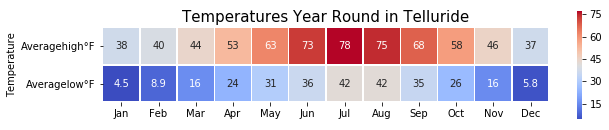

In [54]:
# valid color values for seaborn
# Colormap Possible values are: 
# Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, 
# Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, 
# PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, 
# PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, 
# RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r,
# Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd,
# YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r,
# cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, 
# flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, 
# gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, 
# gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, 
# inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, 
# ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, 
# rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r,
# tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, 
# winter_r

# there's no good reason to do this but visually speaking it's better to look at data this way
temp_data2 = temp_data.copy()
temp_data2 = temp_data2.transpose()

# reds = color red
# reds_r = color red in reverse

plt.figure(figsize=(10, 2))
plt.title('Temperatures Year Round in Telluride', fontsize = 15) # title with fontsize 20
plt.yticks(np.arange(0.5, len(temp_data.index), 1), temp_data.index)
plt.xticks(np.arange(0.5, len(temp_data.columns), 1), temp_data.columns)

sns.heatmap(temp_data2, cmap='coolwarm', square=True, linewidths=0.5, annot=True)
plt.show()

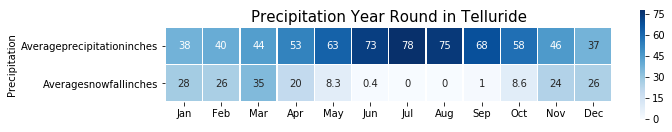

In [55]:
# there's no good reason to do this but visually speaking it's better to look at data this way
prep_data2 = prep_data.copy()
prep_data2 = prep_data2.transpose()

# reds = color red
# reds_r = color red in reverse

plt.figure(figsize=(10, 2))
plt.title('Precipitation Year Round in Telluride', fontsize = 15) # title with fontsize 20
plt.yticks(np.arange(0.5, len(prep_data2.index), 1), prep_data2.index)
plt.xticks(np.arange(0.5, len(prep_data2.columns), 1), prep_data2.columns)

sns.heatmap(prep_data2, cmap='Blues', square=True, linewidths=0.5, annot=True)
plt.show()

### NOTE: Additional analysis should be done in this section to check Temperature and Precipitation for other cities of interest. This is out of scope for this project

### Center on Telluride and find points of interest

In [56]:
CLIENT_ID = '1XKGK5ZVWRKSIZGJCE1ECR0IIBYGPPO24TW4DBSYMREN5STU' # your Foursquare ID
CLIENT_SECRET = '5APXAJH5LASLTJV04O0UWPVLGQBCEZA3KXEY5KVZLTDZJE4J' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: 1XKGK5ZVWRKSIZGJCE1ECR0IIBYGPPO24TW4DBSYMREN5STU
CLIENT_SECRET:5APXAJH5LASLTJV04O0UWPVLGQBCEZA3KXEY5KVZLTDZJE4J


### Get top 100 points of interest in Telluride within a radius of 500 meters

In [57]:
# Note: create a url using Foursquare API
#telluride_latitude, telluride_longitude
radius = 24000 # 15miles from city center
LIMIT = 200
telluride_url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET, 
    telluride_latitude, 
    telluride_longitude, 
    VERSION, 
    radius, 
    LIMIT)
telluride_url

'https://api.foursquare.com/v2/venues/explore?client_id=1XKGK5ZVWRKSIZGJCE1ECR0IIBYGPPO24TW4DBSYMREN5STU&client_secret=5APXAJH5LASLTJV04O0UWPVLGQBCEZA3KXEY5KVZLTDZJE4J&ll=37.9374939,-107.8122852&v=20180604&radius=24000&limit=200'

In [58]:
telluride_results = requests.get(telluride_url).json()
telluride_results

{'meta': {'code': 200, 'requestId': '5e28808340a7ea001c82a79a'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Telluride',
  'headerFullLocation': 'Telluride',
  'headerLocationGranularity': 'city',
  'totalResults': 94,
  'suggestedBounds': {'ne': {'lat': 38.15349411600022,
    'lng': -107.53892161707373},
   'sw': {'lat': 37.72149368399978, 'lng': -108.08564878292628}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b520e36f964a5207d6427e3',
       'name': 'Brown Dog Pizza',
       'location': {'address': '110 E Colorado Ave',
        'lat': 37.93704195245289,
        'lng': -107.81067106844695,
        'labeledLatLngs': [{'label': 'dis

### Create a function to get Categories from the items key

In [59]:
# Note: this function was adapted from the labs for IBM Data Science Captsone project labs
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [60]:
venues = telluride_results['response']['groups'][0]['items']

# venues nearby Casa Loma
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

print("Here's a few interesting ones")
nearby_venues.head(60)

94 venues were returned by Foursquare.
Here's a few interesting ones


,name,categories,lat,lng
0,Brown Dog Pizza,Pizza Place,37.937042,-107.810671
1,The Butcher & Baker Cafe,Sandwich Place,37.936921,-107.809715
2,Taco del Gnar - Telluride,Taco Place,37.937216,-107.813271
3,siam,Thai Restaurant,37.937935,-107.817829
4,Town Park,Park,37.934282,-107.807486
5,Telluride Ski Resort,Ski Area,37.936505,-107.846016
6,La Marmotte,French Restaurant,37.935731,-107.812275
7,New Sheridan Hotel & Chop House,Hotel,37.937689,-107.812670
8,Baked In Telluride,Bakery,37.937069,-107.811937
9,Smugglers Brew Pub,Bar,37.935679,-107.811799


### I'm interested in finding points of interest based on my criteria

In [61]:
# criteria for each city
#- weather - DONE above
#- food - Thai Restaurant, Pizza Place, Café
#- trails - Trail
#- supermarkets - Grocery Store
#- outdoor fun - Ski Area, Outdoors & Recreation

print("My criteria includes: Food/Restaurants, Hiking Trails, Supermarkets, and Outdoor Fun")
nearby_venues.loc[nearby_venues['categories'].isin(['Thai Restaurant', 
                                                    'Pizza Place', 
                                                    'Café', 
                                                    'Trail', 
                                                    'Grocery Store', 
                                                    'Ski Area', 
                                                    'Outdoors & Recreation'])]


My criteria includes: Food/Restaurants, Hiking Trails, Supermarkets, and Outdoor Fun


,name,categories,lat,lng
0,Brown Dog Pizza,Pizza Place,37.937042,-107.810671
3,siam,Thai Restaurant,37.937935,-107.817829
5,Telluride Ski Resort,Ski Area,37.936505,-107.846016
18,Bridal Veil Falls,Outdoors & Recreation,37.928554,-107.776266
21,The Phoenix Bean,Café,37.937812,-107.812414
22,"Station St. Sophia 10,540ft",Ski Area,37.931300,-107.833022
28,See Forever Trail,Trail,37.912764,-107.823630
35,Tracks Cafe & Bar,Pizza Place,37.936769,-107.846014
37,Telluride Main Street,Ski Area,37.937239,-107.811622
38,The Market at Mountain Village,Grocery Store,37.932439,-107.853891


### Create a function to analyze all cities of interest in Colorado

In [62]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Call function above on ALL Colorado cities of interest

In [63]:
colorado_venues = getNearbyVenues(names=co_cities['City'],
                                   latitudes=co_cities['Latitude'],
                                   longitudes=co_cities['Longitude']
                                  )

Telluride
Littleton
Englewood
Evergreen
Estes Park
Monument
Salida
Montrose


In [64]:
# Look at the shape of data for all venues in all cities
print(colorado_venues.shape)
colorado_venues

(228, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Telluride,37.937494,-107.812285,Brown Dog Pizza,37.937042,-107.810671,Pizza Place
1,Telluride,37.937494,-107.812285,Taco del Gnar - Telluride,37.937216,-107.813271,Taco Place
2,Telluride,37.937494,-107.812285,The Butcher & Baker Cafe,37.936921,-107.809715,Sandwich Place
3,Telluride,37.937494,-107.812285,La Marmotte,37.935731,-107.812275,French Restaurant
4,Telluride,37.937494,-107.812285,New Sheridan Hotel & Chop House,37.937689,-107.812670,Hotel
...,...,...,...,...,...,...,...
223,Montrose,38.478320,-107.876174,Sweet Bites Bakery,38.480149,-107.875576,Bakery
224,Montrose,38.478320,-107.876174,Sams Tavern,38.479927,-107.877550,Dive Bar
225,Montrose,38.478320,-107.876174,Elevate Salon,38.480019,-107.878447,Health & Beauty Service
226,Montrose,38.478320,-107.876174,Backstreet Bagel & Deli,38.479873,-107.879339,Bagel Shop


### How many unique categories can be found from all the returned venues

In [65]:
# group venues types
colorado_venues.groupby('Venue Category').count()

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
ATM,1,1,1,1,1,1
American Restaurant,12,12,12,12,12,12
Art Gallery,1,1,1,1,1,1
Arts & Crafts Store,4,4,4,4,4,4
Asian Restaurant,1,1,1,1,1,1
...,...,...,...,...,...,...
Trail,3,3,3,3,3,3
Video Game Store,1,1,1,1,1,1
Vietnamese Restaurant,1,1,1,1,1,1


In [66]:
print('There are {} uniques categories.'.format(len(colorado_venues['Venue Category'].unique())))

There are 101 uniques categories.


### Analyze each City - ONE HOT Analysis

In [67]:
# one hot encoding
colorado_venues_onehot = pd.get_dummies(colorado_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
colorado_venues_onehot['City'] = colorado_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [colorado_venues_onehot.columns[-1]] + list(colorado_venues_onehot.columns[:-1])
colorado_venues_onehot = colorado_venues_onehot[fixed_columns]

colorado_venues_onehot

,City,ATM,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,...,Taco Place,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar
0,Telluride,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Telluride,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Telluride,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Telluride,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Telluride,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,Montrose,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
224,Montrose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
225,Montrose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
226,Montrose,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
colorado_venues_onehot.shape

(228, 102)

### Group rows by city and take the mean of the frequency of occurrences of each category

In [69]:
colorado_venues_grouped = colorado_venues_onehot.groupby('City').mean().reset_index()
colorado_venues_grouped

,City,ATM,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,...,Taco Place,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar
0,Englewood,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000
1,Estes Park,0.014085,0.084507,0.000000,0.056338,0.000000,0.000000,0.000000,0.028169,0.000000,...,0.000000,0.000000,0.014085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Evergreen,0.000000,0.000000,0.047619,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000
3,Littleton,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,0.000000,0.000000,0.030303,...,0.000000,0.030303,0.000000,0.030303,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303
4,Montrose,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.058824,0.058824,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Monument,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.076923,0.076923,0.000000,0.000000,0.076923,0.000000
6,Salida,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Telluride,0.000000,0.087719,0.000000,0.000000,0.000000,0.017544,0.000000,0.017544,0.000000,...,0.017544,0.000000,0.017544,0.000000,0.017544,0.035088,0.000000,0.000000,0.000000,0.000000


In [70]:
# check the shape of the new dataframe
colorado_venues_grouped.shape

(8, 102)

### Print each city along with the top 5 most common venues

In [71]:
# Note: code adapted from IBM Data Science Captsone project labs 
#num_top_venues = 7

#for hood in colorado_venues_grouped['City']:
#    print("----"+city+"----")
    #temp = colorado_venues_grouped[colorado_venues_grouped['City'] == city].T.reset_index()
#    temp.columns = ['venue','freq']
#    temp = temp.iloc[1:]
#    temp['freq'] = temp['freq'].astype(float)
#    temp = temp.round({'freq': 2})
#    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
#    print('\n')

### Create a new dataframe for the previous output

In [72]:
# First define a function that sorts the data (descending)
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [73]:
# Note: code adapted from IBM Data Science Capstone project labs
# Second, create a new dataframe to display the top 10 venues in each NEI
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['City'] = colorado_venues_grouped['City']

for ind in np.arange(colorado_venues_grouped.shape[0]):
    city_venues_sorted.iloc[ind, 1:] = return_most_common_venues(colorado_venues_grouped.iloc[ind, :], num_top_venues)

city_venues_sorted

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Englewood,Chinese Restaurant,Mexican Restaurant,Pet Store,Convenience Store,Restaurant,Event Service,Smoke Shop,Pizza Place,Video Game Store,Gift Shop
1,Estes Park,Gift Shop,American Restaurant,Ice Cream Shop,Mexican Restaurant,Arts & Crafts Store,Dessert Shop,Bar,Sporting Goods Shop,Candy Store,Clothing Store
2,Evergreen,Bar,Restaurant,Candy Store,Breakfast Spot,Pizza Place,Mexican Restaurant,Lake,Farmers Market,Soup Place,Jewelry Store
3,Littleton,Restaurant,Gourmet Shop,Coffee Shop,Mexican Restaurant,Bar,Dive Bar,Pub,Pizza Place,New American Restaurant,Cosmetics Shop
4,Montrose,Brewery,Bank,Sandwich Place,Mexican Restaurant,Fast Food Restaurant,Pizza Place,Movie Theater,Grocery Store,Burger Joint,Sports Bar
5,Monument,Mexican Restaurant,Café,Breakfast Spot,Restaurant,Lake,Spa,Gift Shop,Fishing Spot,Whisky Bar,Thrift / Vintage Store
6,Salida,Coffee Shop,Burrito Place,Grocery Store,Gift Shop,Pizza Place,Fishing Spot,Convenience Store,Cosmetics Shop,Dessert Shop,Dive Bar
7,Telluride,American Restaurant,Hotel,Bar,Pizza Place,Gift Shop,Trail,Café,Sandwich Place,Clothing Store,Sporting Goods Shop


### Begin the CLUSTERING Process using k-means

In [74]:
# set number of clusters
kclusters = 5

colorado_venues_grouped_clustering = colorado_venues_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(colorado_venues_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 0, 0, 0, 3, 4, 1, 0])

### Create a new dataframe that includes the cluster as well as the top 10 venues for each city

In [75]:
# add clustering labels
city_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

city_merged = co_cities

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
city_merged = city_merged.join(city_venues_sorted.set_index('City'), on='City')

city_merged # check the last columns!

,index,City,State,Population,County,Fips,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
292,22537,Telluride,CO,2325,San Miguel,113,37.937494,-107.812285,0,American Restaurant,Hotel,Bar,Pizza Place,Gift Shop,Trail,Café,Sandwich Place,Clothing Store,Sporting Goods Shop
87,20214,Littleton,CO,41737,Arapahoe,005,39.613321,-105.016650,0,Restaurant,Gourmet Shop,Coffee Shop,Mexican Restaurant,Bar,Dive Bar,Pub,Pizza Place,New American Restaurant,Cosmetics Shop
85,20212,Englewood,CO,30255,Arapahoe,005,39.647765,-104.987760,2,Chinese Restaurant,Mexican Restaurant,Pet Store,Convenience Store,Restaurant,Event Service,Smoke Shop,Pizza Place,Video Game Store,Gift Shop
11,17539,Evergreen,CO,9038,Jefferson,059,39.633321,-105.317215,0,Bar,Restaurant,Candy Store,Breakfast Spot,Pizza Place,Mexican Restaurant,Lake,Farmers Market,Soup Place,Jewelry Store
130,21383,Estes Park,CO,5858,Larimer,069,40.377206,-105.521665,0,Gift Shop,American Restaurant,Ice Cream Shop,Mexican Restaurant,Arts & Crafts Store,Dessert Shop,Bar,Sporting Goods Shop,Candy Store,Clothing Store
267,22475,Monument,CO,5530,El Paso,041,39.091659,-104.872758,4,Mexican Restaurant,Café,Breakfast Spot,Restaurant,Lake,Spa,Gift Shop,Fishing Spot,Whisky Bar,Thrift / Vintage Store
179,21474,Salida,CO,5236,Chaffee,015,38.534719,-105.998902,1,Coffee Shop,Burrito Place,Grocery Store,Gift Shop,Pizza Place,Fishing Spot,Convenience Store,Cosmetics Shop,Dessert Shop,Dive Bar
98,20252,Montrose,CO,19132,Montrose,085,38.478320,-107.876174,3,Brewery,Bank,Sandwich Place,Mexican Restaurant,Fast Food Restaurant,Pizza Place,Movie Theater,Grocery Store,Burger Joint,Sports Bar


### Visualize clusters

In [83]:
# create map
colorado_map_clusters = folium.Map(location=[telluride_latitude, telluride_longitude], 
                          tiles = "Stamen Terrain", 
                                   zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(city_merged['Latitude'], 
                                  city_merged['Longitude'], 
                                  city_merged['City'],
                                  city_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color="#007849", 
        fill=True,
        fill_color="#00849",
        fill_opacity=0.5).add_to(colorado_map_clusters)
       
colorado_map_clusters

### Examine Clusters

In [77]:
# Cluster 1
k1 = city_merged.loc[city_merged['Cluster Labels'] == 0, city_merged.columns[[1] + list(range(5, city_merged.shape[1]))]]
k1

,City,Fips,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
292,Telluride,113,37.937494,-107.812285,0,American Restaurant,Hotel,Bar,Pizza Place,Gift Shop,Trail,Café,Sandwich Place,Clothing Store,Sporting Goods Shop
87,Littleton,005,39.613321,-105.016650,0,Restaurant,Gourmet Shop,Coffee Shop,Mexican Restaurant,Bar,Dive Bar,Pub,Pizza Place,New American Restaurant,Cosmetics Shop
11,Evergreen,059,39.633321,-105.317215,0,Bar,Restaurant,Candy Store,Breakfast Spot,Pizza Place,Mexican Restaurant,Lake,Farmers Market,Soup Place,Jewelry Store
130,Estes Park,069,40.377206,-105.521665,0,Gift Shop,American Restaurant,Ice Cream Shop,Mexican Restaurant,Arts & Crafts Store,Dessert Shop,Bar,Sporting Goods Shop,Candy Store,Clothing Store


In [78]:
# Cluster 2
k2 = city_merged.loc[city_merged['Cluster Labels'] == 1, city_merged.columns[[1] + list(range(5, city_merged.shape[1]))]]
k2

,City,Fips,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
179,Salida,015,38.534719,-105.998902,1,Coffee Shop,Burrito Place,Grocery Store,Gift Shop,Pizza Place,Fishing Spot,Convenience Store,Cosmetics Shop,Dessert Shop,Dive Bar


In [79]:
# Cluster 3
k3 = city_merged.loc[city_merged['Cluster Labels'] == 2, city_merged.columns[[1] + list(range(5, city_merged.shape[1]))]]
k3

,City,Fips,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
85,Englewood,005,39.647765,-104.98776,2,Chinese Restaurant,Mexican Restaurant,Pet Store,Convenience Store,Restaurant,Event Service,Smoke Shop,Pizza Place,Video Game Store,Gift Shop


In [80]:
# Cluster 4
k4 = city_merged.loc[city_merged['Cluster Labels'] == 3, city_merged.columns[[1] + list(range(5, city_merged.shape[1]))]]
k4

,City,Fips,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
98,Montrose,085,38.47832,-107.876174,3,Brewery,Bank,Sandwich Place,Mexican Restaurant,Fast Food Restaurant,Pizza Place,Movie Theater,Grocery Store,Burger Joint,Sports Bar


In [81]:
# Cluster 5
k5 = city_merged.loc[city_merged['Cluster Labels'] == 4, city_merged.columns[[1] + list(range(5, city_merged.shape[1]))]]
k5

,City,Fips,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
267,Monument,041,39.091659,-104.872758,4,Mexican Restaurant,Café,Breakfast Spot,Restaurant,Lake,Spa,Gift Shop,Fishing Spot,Whisky Bar,Thrift / Vintage Store


In [82]:
print("k1 shape = ",k1.shape)
print("k2 shape = ",k2.shape)
print("k3 shape = ",k3.shape)
print("k4 shape = ",k4.shape)
print("k5 shape = ",k5.shape)

k1 shape =  (4, 15)
k2 shape =  (1, 15)
k3 shape =  (1, 15)
k4 shape =  (1, 15)
k5 shape =  (1, 15)


### Conclusion: Cluster K1 has the largest with 4 candidate cities. All other clusters seem to have single cities that might not have enough points of interest given the criteria provided for the analysis. It's interesting to notice that the cluster K1 contains Telluride and validates the original assertion.